## What is the problem?
Predict the survival of passengers on the Titanic, a classic binary classification problem. The objective is to model the probability that a passenger survived based on various features.

## What is the type of machine learning?
The approach used is supervised learning because the model is trained using a dataset that includes both the input features (predictors) and the output label (the target variable 'Survived'). Specifically, the technique applied is logistic regression, which is used for binary classification tasks.

### Target Variable: 'Survived'
	survived
### Feature Variables:
	pclass	sex	age	sibsp	parch	

In [59]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
# load dataset
df = pd.read_csv('../Dataset/titanic2.csv')
df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1.0,1.0,female,29.0000,0.0,0.0,211.3375,S
1,1.0,1.0,male,0.9167,1.0,2.0,151.5500,S
2,1.0,0.0,female,2.0000,1.0,2.0,151.5500,S
3,1.0,0.0,male,30.0000,1.0,2.0,151.5500,S
4,1.0,0.0,female,25.0000,1.0,2.0,151.5500,S


In [61]:
# check the shape of the dataset
df.shape

(1310, 8)

In [62]:
# summary statistics
df.describe() 

,pclass,survived,age,sibsp,parch,fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


In [63]:
# check for missing values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   float64
 1   survived  1309 non-null   float64
 2   sex       1309 non-null   object 
 3   age       1046 non-null   float64
 4   sibsp     1309 non-null   float64
 5   parch     1309 non-null   float64
 6   fare      1308 non-null   float64
 7   embarked  1307 non-null   object 
dtypes: float64(6), object(2)
memory usage: 82.0+ KB


In [64]:
# drop missing values since they are few
df = df.dropna(axis=0)

In [65]:
# double check if missing values have been dropped
df.isna().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [66]:
# check for unique values for categorical columns
for column in df.drop(['age', 'fare'], axis=1).columns:
    print(df[column].value_counts())

pclass
3.0    500
1.0    282
2.0    261
Name: count, dtype: int64
survived
0.0    618
1.0    425
Name: count, dtype: int64
sex
male      657
female    386
Name: count, dtype: int64
sibsp
0.0    682
1.0    280
2.0     36
4.0     22
3.0     16
5.0      6
8.0      1
Name: count, dtype: int64
parch
0.0    765
1.0    160
2.0     97
3.0      8
5.0      6
4.0      5
6.0      2
Name: count, dtype: int64
embarked
S    781
C    212
Q     50
Name: count, dtype: int64


In [67]:
# reshuffle the dataset
df.sample(frac=1).reset_index(drop=True, inplace=True)
df.head(3)

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1.0,1.0,female,29.0000,0.0,0.0,211.3375,S
1,1.0,1.0,male,0.9167,1.0,2.0,151.5500,S
2,1.0,0.0,female,2.0000,1.0,2.0,151.5500,S


In [68]:
# check for duplicates
df.duplicated().sum()

72

In [69]:
# observe the duplicates in the dataset
df[df.duplicated()]

,pclass,survived,sex,age,sibsp,parch,fare,embarked
185,1.0,0.0,male,42.0,0.0,0.0,26.5500,S
243,1.0,0.0,male,46.0,0.0,0.0,79.2000,C
255,1.0,1.0,female,24.0,0.0,0.0,69.3000,C
321,1.0,0.0,male,62.0,0.0,0.0,26.5500,S
331,2.0,0.0,male,18.0,0.0,0.0,11.5000,S
...,...,...,...,...,...,...,...,...
1271,3.0,0.0,male,28.0,0.0,0.0,9.5000,S
1277,3.0,1.0,male,22.0,0.0,0.0,7.2250,C
1278,3.0,0.0,male,20.0,0.0,0.0,7.8542,S
1280,3.0,0.0,male,22.0,0.0,0.0,7.8958,S


Observed that there are no duplicates in the dataset

In [70]:
# convert the data types of selected columns to integer
df[['pclass', 'survived', 'age', 'sibsp', 'parch']] = df[['pclass', 'survived', 'age', 'sibsp', 'parch']].astype('int')

In [71]:
# count the number of survivors and non-survivors
df['survived'].value_counts()

survived
0    618
1    425
Name: count, dtype: int64

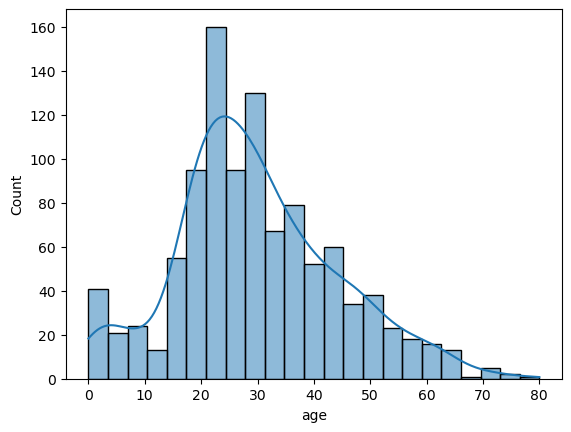

In [73]:
sns.histplot(data=df, x='age', kde=True)
plt.show()

In [74]:
# save the cleaned dataset
df.to_csv('cleaned_df.csv', index=False)
pd.read_csv('cleaned_df.csv').head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29,0,0,211.3375,S
1,1,1,male,0,1,2,151.5500,S
2,1,0,female,2,1,2,151.5500,S
3,1,0,male,30,1,2,151.5500,S
4,1,0,female,25,1,2,151.5500,S


In [75]:
# transform the sex values into 1 and 0 for better performance for models
df['sex'] = df['sex'].replace(['male', 'female'], [1, 0])

C:\Users\x-ibah\AppData\Local\Temp\ipykernel_12396\540936261.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sex'] = df['sex'].replace(['male', 'female'], [1, 0])


In [76]:
df = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'survived']]
df.head()

,pclass,sex,age,sibsp,parch,survived
0,1,0,29,0,0,1
1,1,1,0,1,2,1
2,1,0,2,1,2,0
3,1,1,30,1,2,0
4,1,0,25,1,2,0


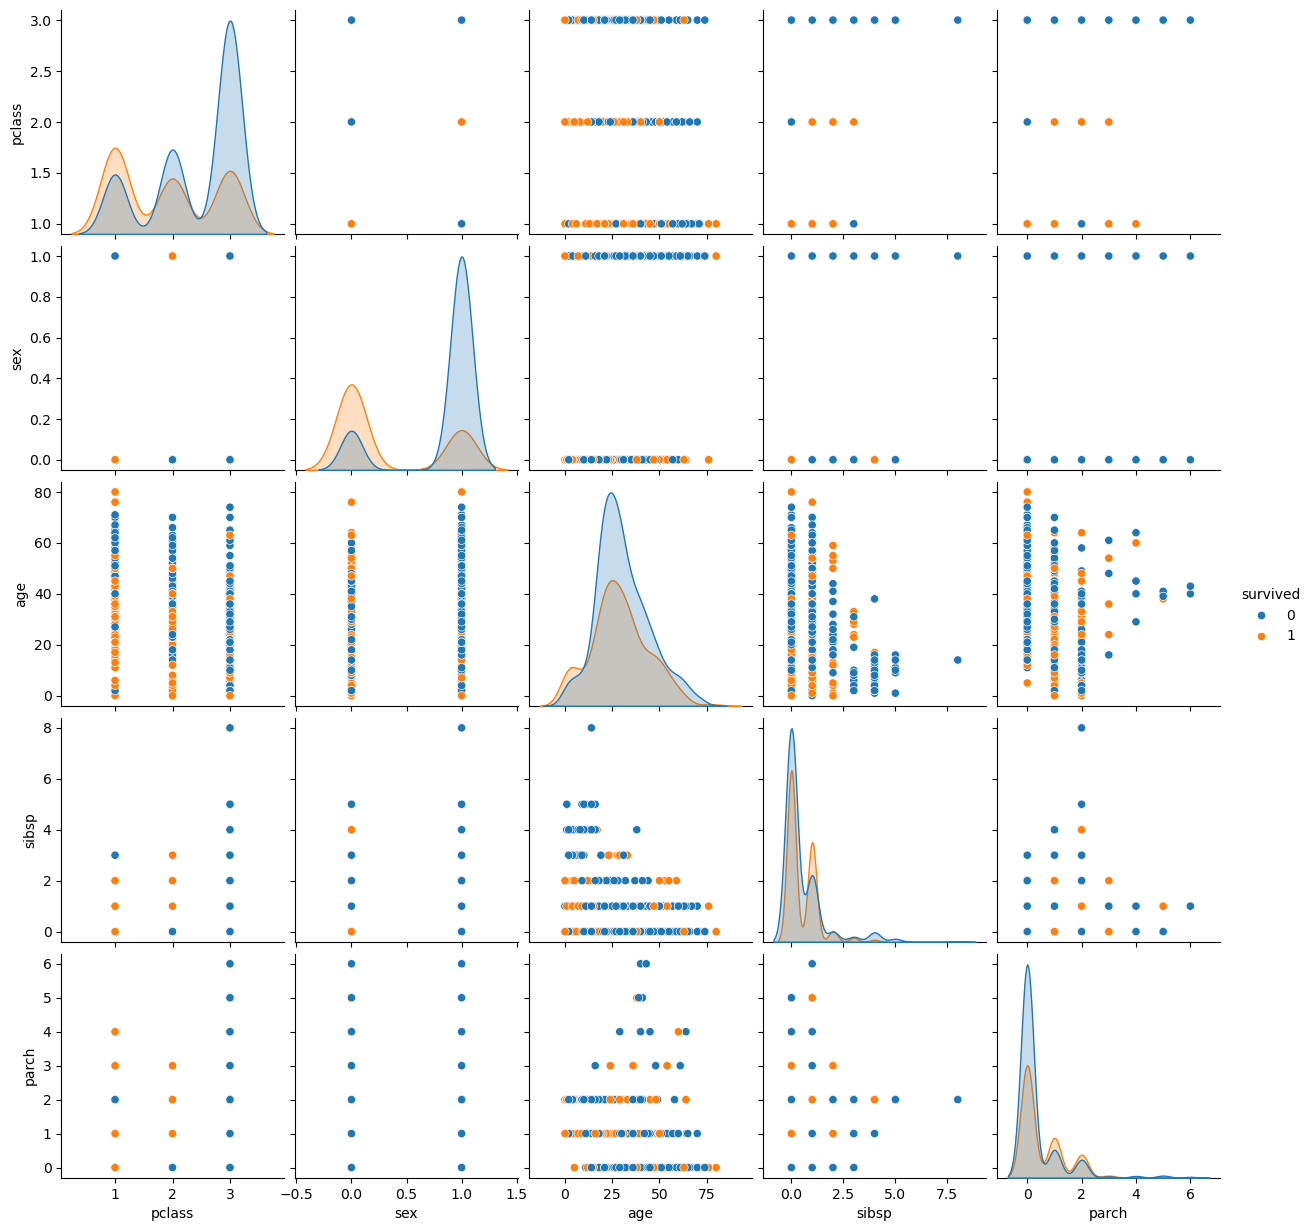

In [86]:
# plot the pairplot 
sns.pairplot(df, hue='survived')
plt.show()

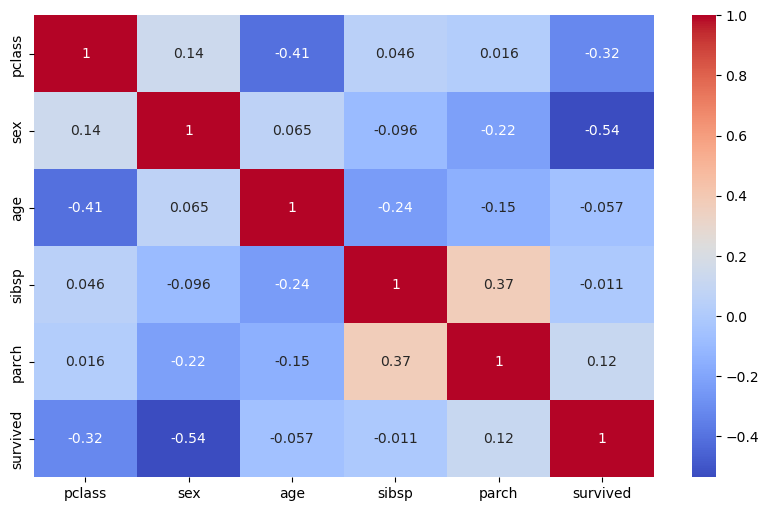

In [90]:
# plot the heatmap for the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [77]:
# split the dataset into features and target
y = df['survived']
X = df.drop('survived', axis=1)

In [78]:
# standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [79]:
# split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

In [80]:
# load the libraries from scikit-learn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [81]:
# train the model and make predictions 
model = KNeighborsClassifier(n_neighbors=14)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8181818181818182


In [91]:
# report the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.93      0.85       120
           1       0.87      0.67      0.76        89

    accuracy                           0.82       209
   macro avg       0.83      0.80      0.81       209
weighted avg       0.83      0.82      0.81       209



In [82]:
# create a function to predict the survival of a passenger
def survived(model, pclass=3, sex=1, age=33, sibsp=1, parch=4):
    x = np.array([[pclass, sex, age, sibsp, parch]]).reshape(1, -1)

    # Apply preprocessing (e.g., scaling)
    x = scaler.transform(x)
    
    # Make predictions
    prediction = model.predict(x)
    
    # Determine the outcome
    if prediction[0] == 0:
        result = "Did not survive"
    else:
        result = "Survived"
    
    # Print the result and probabilities
    print(f"Prediction: {result}")

In [84]:
# Gather user input
pclass = int(input("Enter passenger class (1 = First, 2 = Second, 3 = Third): "))
sex = int(input("Enter sex (1 = Male, 0 = Female): "))
age = int(input("Enter age (0 to 80): "))
sibsp = int(input("Enter number of siblings/spouses aboard (0 to 8): "))
parch = int(input("Enter number of parents/children aboard (0 to 6): "))

# Validate input ranges
if not (1 <= pclass <= 3):
    raise ValueError("Passenger class must be between 1 and 3.")
if sex not in [0, 1]:
    raise ValueError("Sex must be 0 (Female) or 1 (Male).")
if not (0 <= age <= 80):
    raise ValueError("Age must be between 0 and 80.")
if not (0 <= sibsp <= 8):
    raise ValueError("Number of siblings/spouses must be between 0 and 8.")
if not (0 <= parch <= 6):
    raise ValueError("Number of parents/children must be between 0 and 6.")

# Call the function with specific inputs
survived(model, pclass, sex, age, sibsp, parch)

Prediction: Survived


c:\Users\x-ibah\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
